<a href="https://www.kaggle.com/code/mahsan/pakistan-toshakhana-descriptive-data-analysis?scriptVersionId=122376659" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
file_path = '/kaggle/input/pakistan-toshakhana-files/Refined_TK_data ver 2.csv'

/kaggle/input/pakistan-toshakhana-files/Refined_TK_data ver 2.csv
/kaggle/input/pakistan-toshakhana-files/Toshakhana Files 2.xlsx


# Data Sample

In [2]:
df = pd.read_csv(file_path)
df.tail()

,Detail of Gifts,Item Category,Name of Recipient,Affiliation,Date,Assessed Value,Retention Cost,Retained,Remarks
4209,One Model of Door of\nKhana Kaaba,NaN,"Mian Muhammad Shehbaz Sharif,\nPrime Minist...",PMLN,10/18/2022,35000.0,0.0,Displayed\nat Prime\nMinister\nHouse,Displayed\nat Prime\nMinister\nHouse
4210,One Calligraphy duly\nframed,NaN,"SP Mahzoor Ali Ghauri, Chief\nSecurity Off...",NaN,10/20/2022,42000.0,6000.0,Yes,Yes
4211,a. Torsyk Set with\nsilver Tray\nb. Book\nc. ...,NaN,"Mian Muhammad Shehbaz Sharif,\nPrime Minist...",PMLN,10/20/2022,85000.0,0.0,S.No.(a)\ndisplayed at\nPrime\nMinister\nHouse...,S.No.(a)\ndisplayed at\nPrime\nMinister\nHouse...
4212,One Carved wood\npanel,NaN,"Mian Muhammad Shehbaz Sharif,\nPrime Minist...",PMLN,10/20/2022,50000.0,0.0,No,No
4213,a. One Mont Blanc\nBrief Case\nb. One Mont ...,Pen,"Mr. Bilawal Bhutto Zardari,\nMinister for F...",PPP,10/24/2022,434000.0,0.0,No,No


# Data Cleaning

In [3]:
df['Detail of Gifts'] = df['Detail of Gifts'].str.replace('\n',' ')
df['Name of Recipient'] = df['Name of Recipient'].str.replace('\n',',')
df['Retained'] = df['Retained'].str.replace('\n',' ')
df['Remarks'] = df['Remarks'].str.replace('\n',' ')

df.tail()

,Detail of Gifts,Item Category,Name of Recipient,Affiliation,Date,Assessed Value,Retention Cost,Retained,Remarks
4209,One Model of Door of Khana Kaaba,NaN,"Mian Muhammad Shehbaz Sharif,,Prime Ministe...",PMLN,10/18/2022,35000.0,0.0,Displayed at Prime Minister House,Displayed at Prime Minister House
4210,One Calligraphy duly framed,NaN,"SP Mahzoor Ali Ghauri, Chief,Security Offi...",NaN,10/20/2022,42000.0,6000.0,Yes,Yes
4211,a. Torsyk Set with silver Tray b. Book c. Boo...,NaN,"Mian Muhammad Shehbaz Sharif,,Prime Ministe...",PMLN,10/20/2022,85000.0,0.0,S.No.(a) displayed at Prime Minister House S.N...,S.No.(a) displayed at Prime Minister House S.N...
4212,One Carved wood panel,NaN,"Mian Muhammad Shehbaz Sharif,,Prime Ministe...",PMLN,10/20/2022,50000.0,0.0,No,No
4213,a. One Mont Blanc Brief Case b. One Mont B...,Pen,"Mr. Bilawal Bhutto Zardari,,Minister for Fo...",PPP,10/24/2022,434000.0,0.0,No,No


# Most Famous Gift Categories

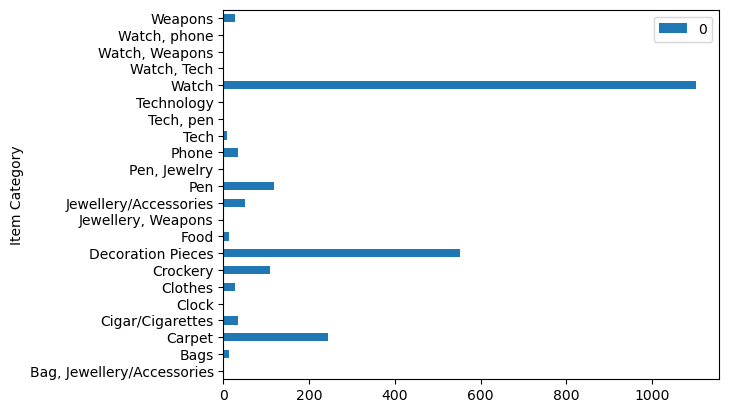

In [4]:
import pandas as pd
result = pd.DataFrame(df.groupby("Item Category").size())
plot = result.plot.barh()

# Top Gift Receivers

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


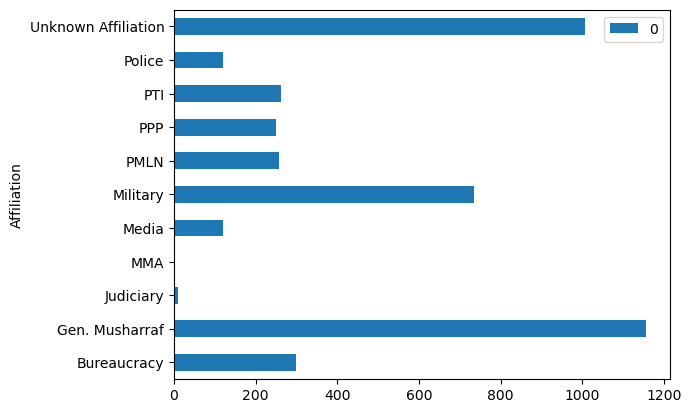

In [5]:
df["Affiliation"] = df["Affiliation"].str.replace('Gen Mus','Gen. Musharraf')
df["Affiliation"] = df["Affiliation"].str.replace('Gen. Musharrafarraf','Gen. Musharraf')
df["Affiliation"] = df["Affiliation"].fillna('Unknown Affiliation')
result = pd.DataFrame(df.groupby("Affiliation").size())
plot = result.plot.barh()

# Top Gift Retainers

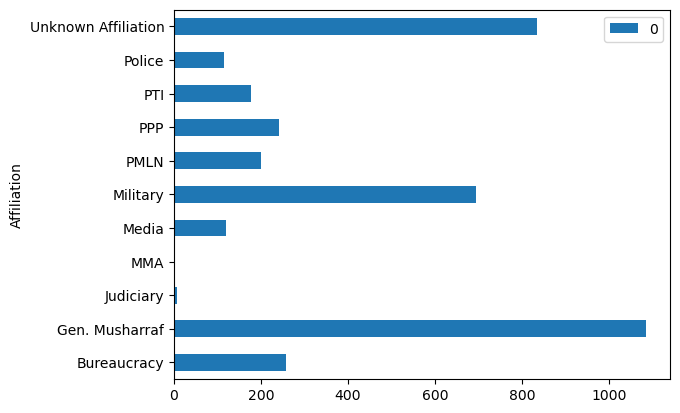

In [6]:
retained_df = df[df['Retained']=="Yes"]
result = pd.DataFrame(retained_df.groupby("Affiliation").size())
plot = result.plot.barh()